In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
titanic_data = pd.read_csv('titanic.csv', sep=',')
titanic_data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [7]:
columns_to_drop = ['Name','Fare']
titanic_data.drop(columns_to_drop,axis='columns',inplace=True)

In [8]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [9]:
titanic_data.columns = ['Survived','Pclass','Sex','Age','sibSp', "Parch"]
titanic_data.head(10)

,Survived,Pclass,Sex,Age,sibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [10]:
print(titanic_data.shape)

(887, 6)


In [11]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
sibSp         int64
Parch         int64
dtype: object

In [12]:
titanic_data = pd.get_dummies(titanic_data,columns=['Sex'],drop_first=True)
titanic_data.dtypes

Survived      int64
Pclass        int64
Age         float64
sibSp         int64
Parch         int64
Sex_male       bool
dtype: object

In [13]:
titanic_data.rename(columns={'Sex_male':'Sex'}, inplace=True)
titanic_data.head(10)

,Survived,Pclass,Age,sibSp,Parch,Sex
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
5,0,3,27.0,0,0,True
6,0,1,54.0,0,0,True
7,0,3,2.0,3,1,True
8,1,3,27.0,0,2,False
9,1,2,14.0,1,0,False


In [15]:
titanic_data = titanic_data[['Survived','Pclass','Sex','Age','sibSp','Parch']]
titanic_data.head(10)

,Survived,Pclass,Sex,Age,sibSp,Parch
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0
5,0,3,True,27.0,0,0
6,0,1,True,54.0,0,0
7,0,3,True,2.0,3,1
8,1,3,False,27.0,0,2
9,1,2,False,14.0,1,0


In [16]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data.Survived

print(X.shape,y.shape)

(887, 5) (887,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=00000)

In [18]:
print(X_test.shape, X_train.shape)

(267, 5) (620, 5)


In [19]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2,random_state=00000)

In [20]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Evaluacion del Modelo

In [21]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print("El accuracy en train es ", train_accuracy)

print("El accuracy en test es ", test_accuracy)

El accuracy en train es  0.8048387096774193
El accuracy en test es  0.7640449438202247


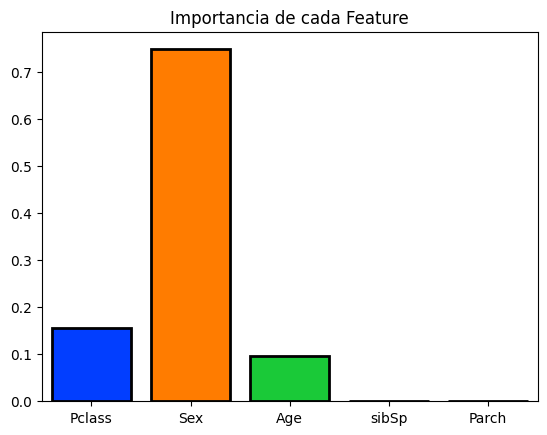

In [27]:
import seaborn as sns

importances  = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()